In [20]:
import pandas as pd 
import numpy as np
np.random.seed(42)
data={
    'canditate_id': range(1001,1201),
    'recruiment_source': np.random.choice(['LinkedIn','Corprate Website','Indeed'], 200),
    'psychometric_test_score': np.random.randint(0,16,200),
    'interview_performance_score' : np.random.randint(1,11,200),
    'hiring_status':np.random.choice(['Hired','Rejected'],200, p=[0.25,0.75])
}
df_hr = pd.DataFrame(data)
print(df_hr.head())

   canditate_id recruiment_source  ...  interview_performance_score  hiring_status
0          1001            Indeed  ...                            1       Rejected
1          1002          LinkedIn  ...                            1       Rejected
2          1003            Indeed  ...                            5       Rejected
3          1004            Indeed  ...                            6       Rejected
4          1005          LinkedIn  ...                            3       Rejected

[5 rows x 5 columns]


In [21]:
import sqlite3
conn = sqlite3.connect(':memory:')
df_hr.to_sql('canditates',conn, index=False, if_exists='replace')
print("Data successfully converted to SQL table: 'candidates'")

Data successfully converted to SQL table: 'candidates'


In [22]:
SELECT 
    recruiment_source, 
    COUNT(canditate_id) AS total_applicants,
    ROUND(AVG(psychometric_test_score), 2) AS avg_psych_score,
    ROUND(AVG(interview_performance_score), 2) AS avg_interview_score
FROM df_hr
GROUP BY recruiment_source
ORDER BY avg_interview_score DESC;

,recruiment_source,total_applicants,avg_psych_score,avg_interview_score
0,LinkedIn,66,7.03,5.76
1,Indeed,73,6.49,5.53
2,Corprate Website,61,7.08,5.34


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 
correlation = df_hr['psychometric_test_score'].corr(df_hr['interview_performance_score'])
print(f"The Correlation between Psych Score and Interview Score is: {correlation:.2f}")

The Correlation between Psych Score and Interview Score is: 0.12


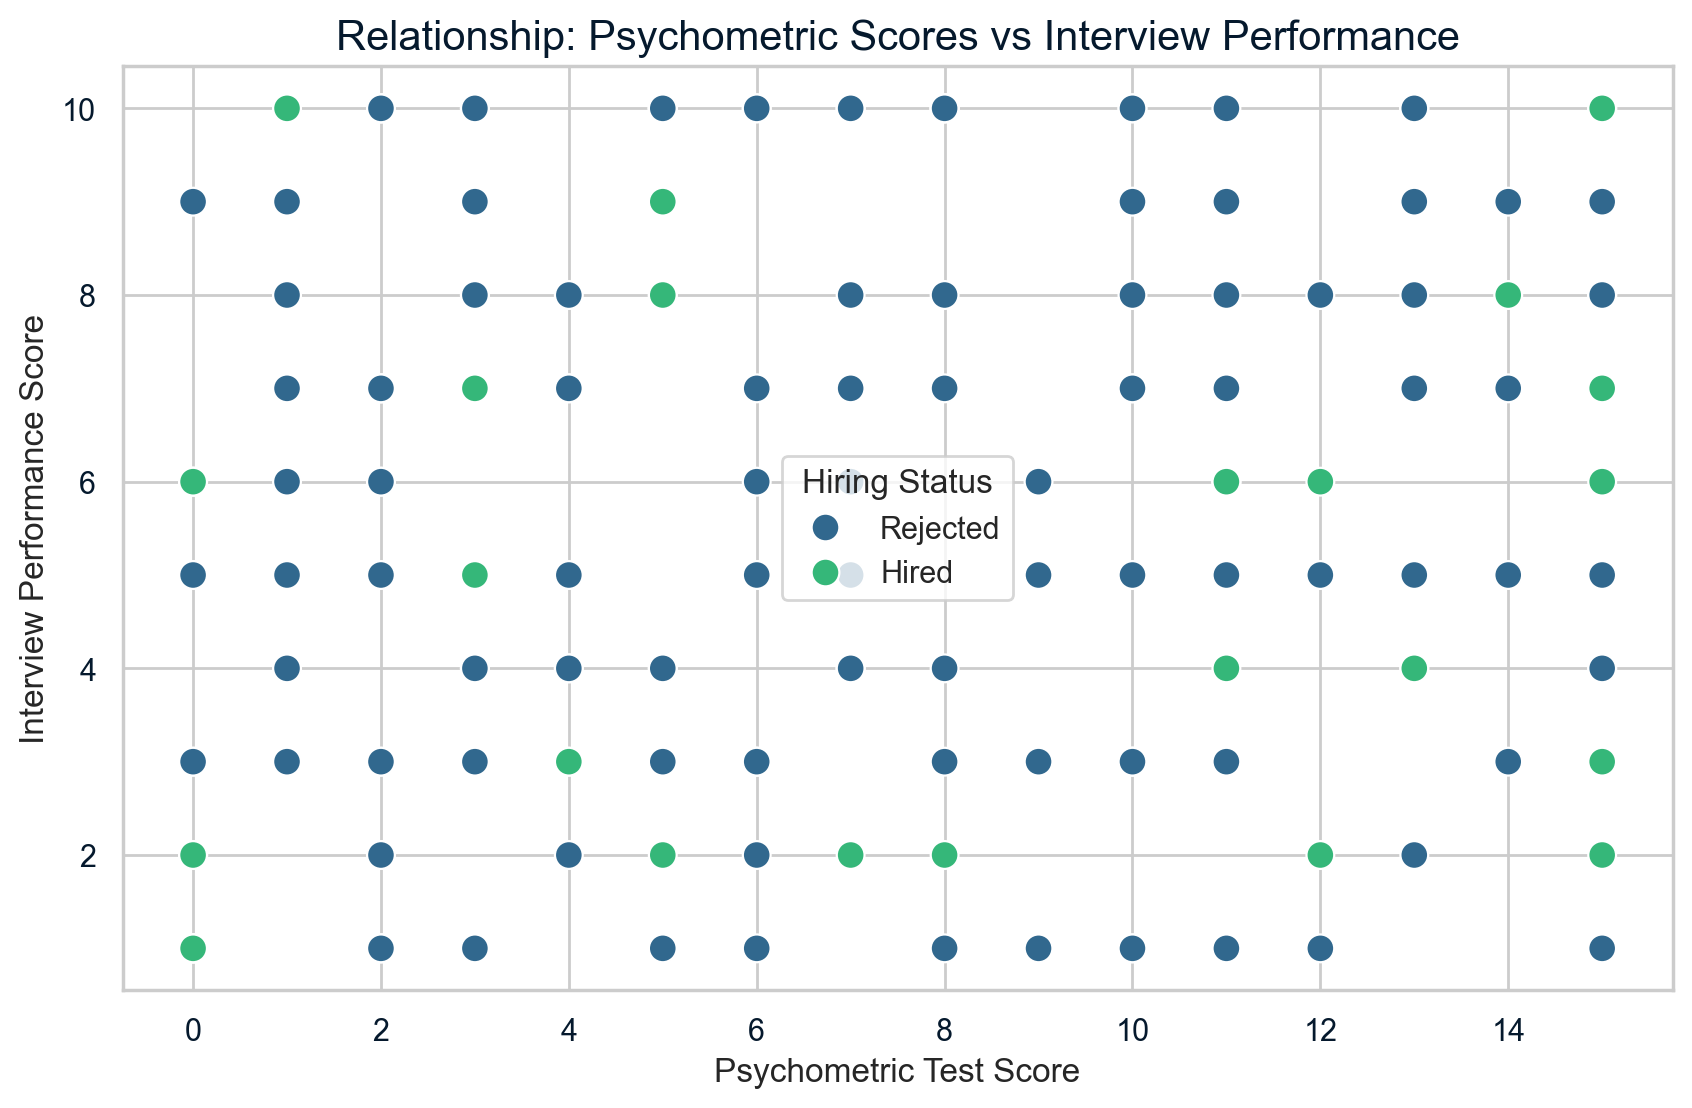

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_hr, x='psychometric_test_score', y='interview_performance_score', hue='hiring_status', palette='viridis', s=100)
plt.title('Relationship: Psychometric Scores vs Interview Performance', fontsize=15)
plt.xlabel('Psychometric Test Score', fontsize=12)
plt.ylabel('Interview Performance Score', fontsize=12)
plt.legend(title='Hiring Status')
plt.show()

In [25]:
df_hr.to_csv('talent_science_data.csv', index=False)
print("File 'talent_science_data.csv' is ready for download!")

File 'talent_science_data.csv' is ready for download!


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_hr['hiring_numeric'] = le.fit_transform(df_hr['hiring_status'])
df_hr['source_numeric'] = le.fit_transform(df_hr['recruiment_source'])
X = df_hr[['psychometric_test_score', 'interview_performance_score', 'source_numeric']]
y = df_hr['hiring_numeric']
model = RandomForestClassifier()
model.fit(X, y)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)
print("--- Feature Importance for Hiring Decision ---")
print(importance)

--- Feature Importance for Hiring Decision ---
                       Feature  Importance
0      psychometric_test_score    0.477412
1  interview_performance_score    0.412199
2               source_numeric    0.110390
